In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def load_and_clean_data(file_path):
    """
    Loads the household power consumption dataset, cleans it, and saves a processed version.
    """
    # Load the dataset with appropriate parsing
    df = pd.read_csv(
        file_path,
        sep=',',
        header=0,
        low_memory=False,
        infer_datetime_format=True,
        parse_dates={'datetime': ['Date', 'Time']},
        index_col=['datetime'],
        na_values=['?']
    )

    # All numeric columns should be float
    for col in df.columns:
        df[col] = df[col].astype('float64')

    # Impute missing values using forward fill
    df.fillna(method='ffill', inplace=True)

    return df

# Load the data
file_path = 'household_power_consumption.csv'
df_cleaned = load_and_clean_data(file_path)

print("Data loaded and cleaned successfully.")
print(df_cleaned.info())
print("\nMissing values after cleaning:")
print(df_cleaned.isnull().sum())

Data loaded and cleaned successfully.
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1048575 entries, 2006-12-16 17:24:00 to 2008-12-13 21:38:00
Data columns (total 7 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Global_active_power    1048575 non-null  float64
 1   Global_reactive_power  1048575 non-null  float64
 2   Voltage                1048575 non-null  float64
 3   Global_intensity       1048575 non-null  float64
 4   Sub_metering_1         1048575 non-null  float64
 5   Sub_metering_2         1048575 non-null  float64
 6   Sub_metering_3         1048575 non-null  float64
dtypes: float64(7)
memory usage: 64.0 MB
None

Missing values after cleaning:
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


In [5]:
df_cleaned

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2008-12-13 21:34:00,0.426,0.076,242.27,1.8,0.0,0.0,0.0
2008-12-13 21:35:00,0.424,0.076,242.10,1.8,0.0,0.0,0.0
2008-12-13 21:36:00,0.422,0.076,241.73,1.8,0.0,0.0,0.0


In [9]:
import pandas as pd

def resample_and_feature_engineer(df):
    """
    Resamples the data to an hourly frequency and engineers new features.
    """
    # Resample to hourly frequency, taking the mean
    df_resampled = df.resample('H').mean()

    # Create the sub_metering_remainder feature
    # Note: The formula is for watt-hours, and our resampled data is in kilowatts (power).
    # We will create a power-based remainder for consistency.
    # Convert Global_active_power to watts
    gap_watts = df_resampled['Global_active_power'] * 1000
    # Corrected: Select specific columns from the DataFrame
    sm1_watts = df_resampled['Sub_metering_1']
    sm2_watts = df_resampled['Sub_metering_2']
    sm3_watts = df_resampled['Sub_metering_3']

    # Your calculation now correctly subtracts series from a series
    df_resampled['sub_metering_remainder'] = (gap_watts / 60) - sm1_watts - sm2_watts - sm3_watts
    # Ensure no negative values due to measurement discrepancies
    df_resampled['sub_metering_remainder'] = df_resampled['sub_metering_remainder'].clip(lower=0)

    # Engineer time-based features
    df_resampled['hour'] = df_resampled.index.hour
    df_resampled['day_of_week'] = df_resampled.index.dayofweek
    df_resampled['day_of_year'] = df_resampled.index.dayofyear
    df_resampled['month'] = df_resampled.index.month
    df_resampled['quarter'] = df_resampled.index.quarter
    df_resampled['year'] = df_resampled.index.year

    return df_resampled

# Your existing code to load and apply the function (requires a valid df_cleaned object)
df_hourly = resample_and_feature_engineer(df_cleaned)
print("Data resampled and features engineered successfully.")
df_hourly.head()

Data resampled and features engineered successfully.


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_remainder,hour,day_of_week,day_of_year,month,quarter,year
datetime,,,,,,,,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111,52.992593,17,5,350,12,4,2006
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667,36.953333,18,5,350,12,4,2006
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333,38.553889,19,5,350,12,4,2006
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333,37.692778,20,5,350,12,4,2006
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667,33.307778,21,5,350,12,4,2006


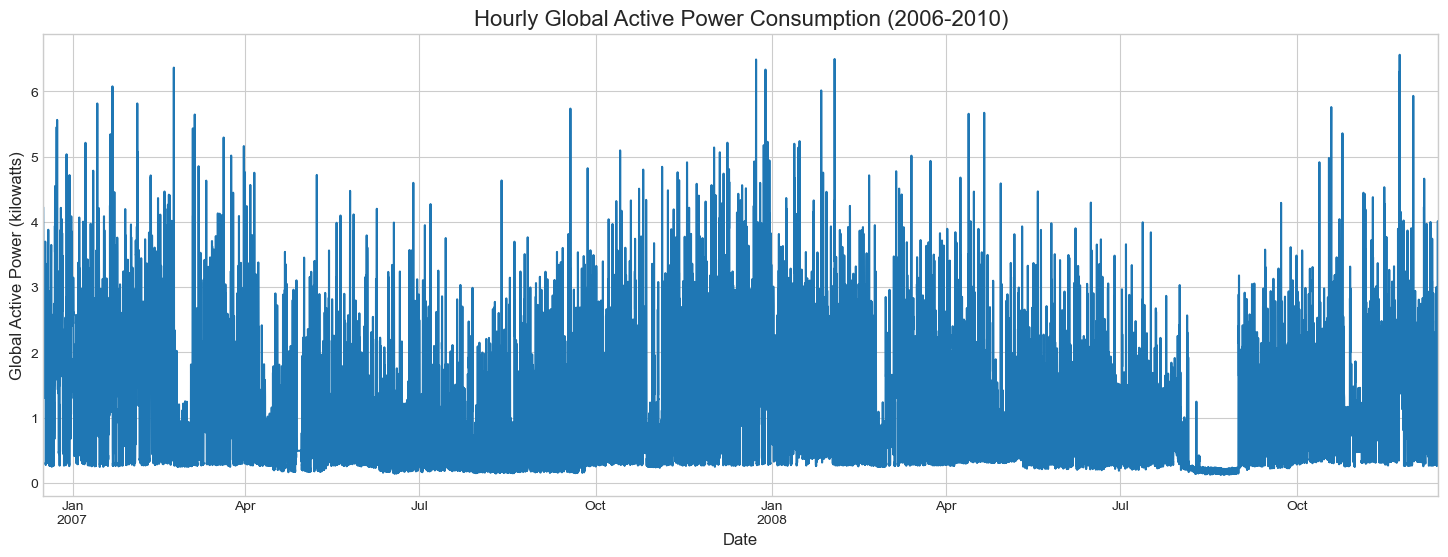

In [11]:
# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')

# Plot the overall time series for Global Active Power
plt.figure(figsize=(18, 6))
df_hourly['Global_active_power'].plot()
plt.title('Hourly Global Active Power Consumption (2006-2010)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Global Active Power (kilowatts)', fontsize=12)
plt.show()

In [14]:
df_hourly.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_remainder,hour,day_of_week,day_of_year,month,quarter,year
count,17477.000000,17477.000000,17477.000000,17477.000000,17477.000000,17477.000000,17477.000000,17477.000000,17477.000000,17477.000000,17477.000000,17477.000000,17477.000000,17477.000000
mean,1.106132,0.118648,239.946601,4.709755,1.172944,1.469572,5.913266,9.879758,11.502146,3.000572,182.590719,6.498827,2.501802,2007.456772
std,0.966757,0.065452,3.045551,4.062642,3.630846,4.636847,7.216221,9.286230,6.922598,2.000057,105.174599,3.439495,1.115733,0.538652
min,0.124000,0.021033,225.834500,0.503333,0.000000,0.000000,0.000000,1.379444,0.000000,0.000000,1.000000,1.000000,1.000000,2006.000000
25%,0.310467,0.075000,238.111167,1.380000,0.000000,0.000000,0.000000,4.358333,6.000000,1.000000,92.000000,4.000000,2.000000,2007.000000
50%,0.767200,0.101900,240.186167,3.300000,0.000000,0.316667,1.516667,5.805556,12.000000,3.000000,183.000000,7.000000,3.000000,2007.000000
75%,1.619933,0.141067,241.953333,6.826667,0.000000,0.600000,13.000000,11.897222,18.000000,5.000000,274.000000,9.000000,3.000000,2008.000000
max,6.560533,0.682000,250.342500,28.383333,48.366667,46.433333,20.116667,64.837222,23.000000,6.000000,365.000000,12.000000,4.000000,2008.000000


In [13]:
df_cleaned.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.106076e+00,1.186472e-01,2.399467e+02,4.709510e+00,1.172995e+00,1.469623e+00,5.913134e+00
std,1.128046e+00,1.095520e-01,3.285786e+00,4.757113e+00,6.309644e+00,6.341119e+00,8.203559e+00
min,7.600000e-02,0.000000e+00,2.234900e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.880000e-01,0.000000e+00,2.379400e+02,1.200000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.420000e-01,9.800000e-02,2.402000e+02,2.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.542000e+00,1.880000e-01,2.421400e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.067000e+01,1.390000e+00,2.521400e+02,4.640000e+01,8.000000e+01,7.800000e+01,3.100000e+01


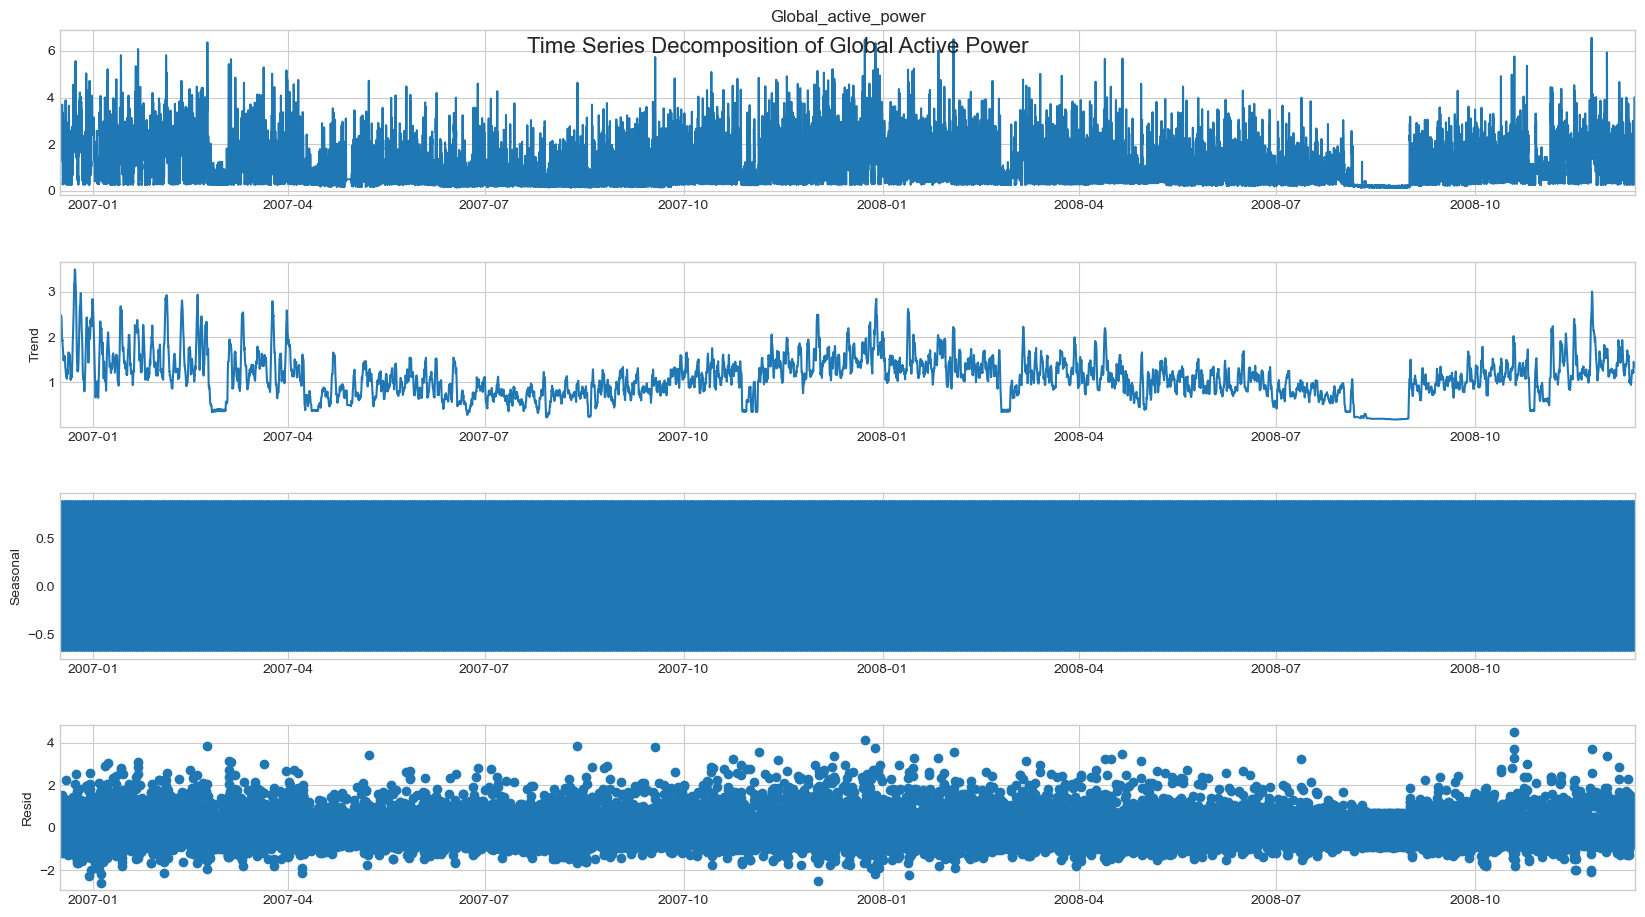

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series (using a daily seasonality, i.e., 24 periods for hourly data)
decomposition = seasonal_decompose(df_hourly['Global_active_power'], model='additive', period=24)

fig = decomposition.plot()
fig.set_size_inches(18, 10)
plt.suptitle('Time Series Decomposition of Global Active Power', y=0.92, fontsize=16)
plt.show()

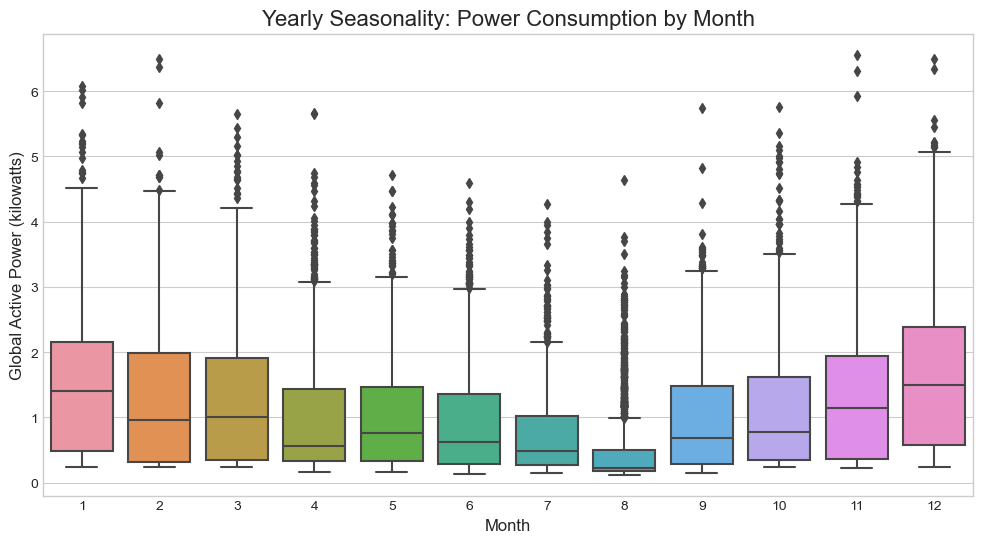

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='Global_active_power', data=df_hourly)
plt.title('Yearly Seasonality: Power Consumption by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Global Active Power (kilowatts)', fontsize=12)
plt.show()

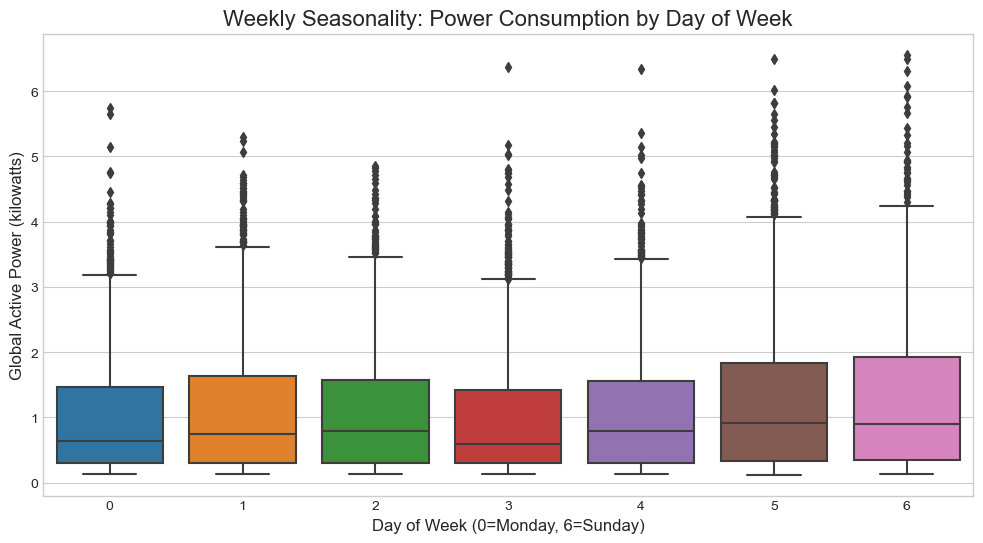

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='day_of_week', y='Global_active_power', data=df_hourly)
plt.title('Weekly Seasonality: Power Consumption by Day of Week', fontsize=16)
plt.xlabel('Day of Week (0=Monday, 6=Sunday)', fontsize=12)
plt.ylabel('Global Active Power (kilowatts)', fontsize=12)
plt.xticks(ticks=range(7))
plt.show()

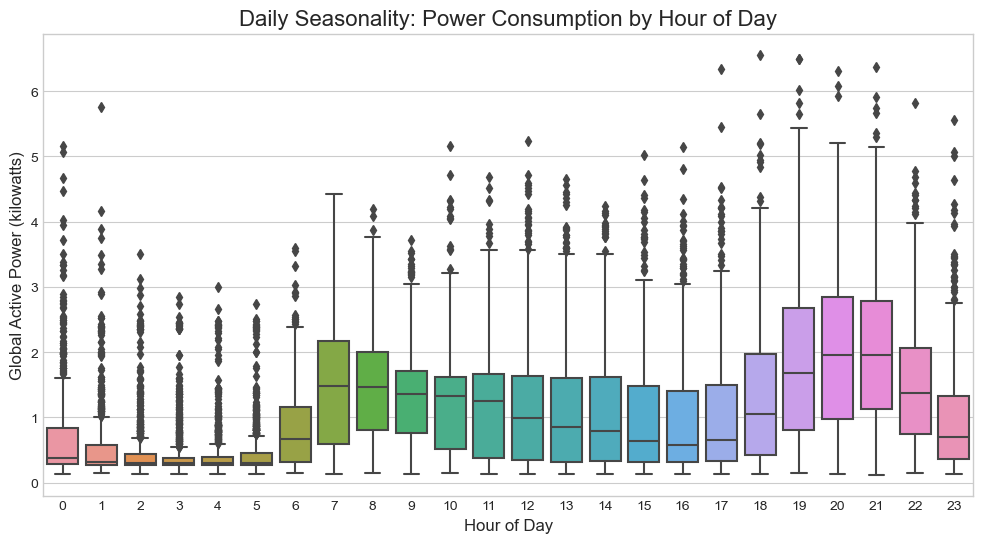

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='Global_active_power', data=df_hourly)
plt.title('Daily Seasonality: Power Consumption by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Global Active Power (kilowatts)', fontsize=12)
plt.show()

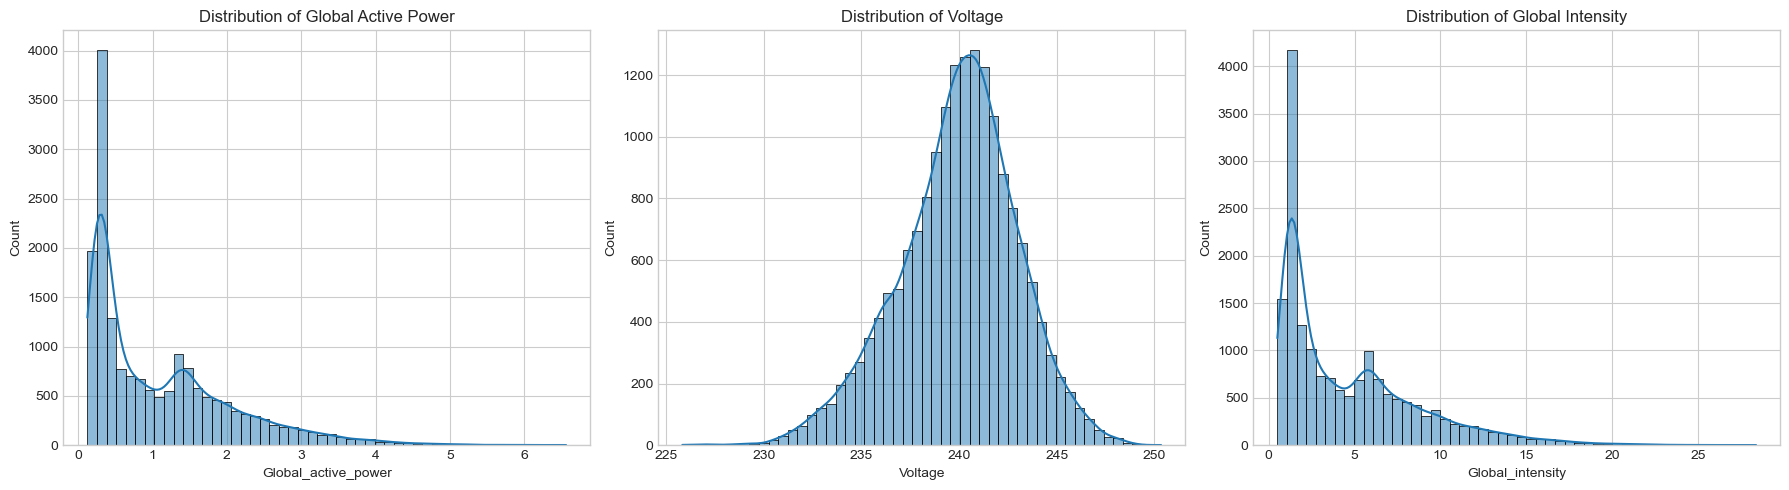

In [20]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_hourly['Global_active_power'], kde=True, bins=50)
plt.title('Distribution of Global Active Power')

plt.subplot(1, 3, 2)
sns.histplot(df_hourly['Voltage'], kde=True, bins=50)
plt.title('Distribution of Voltage')

plt.subplot(1, 3, 3)
sns.histplot(df_hourly['Global_intensity'], kde=True, bins=50)
plt.title('Distribution of Global Intensity')

plt.tight_layout()
plt.show()

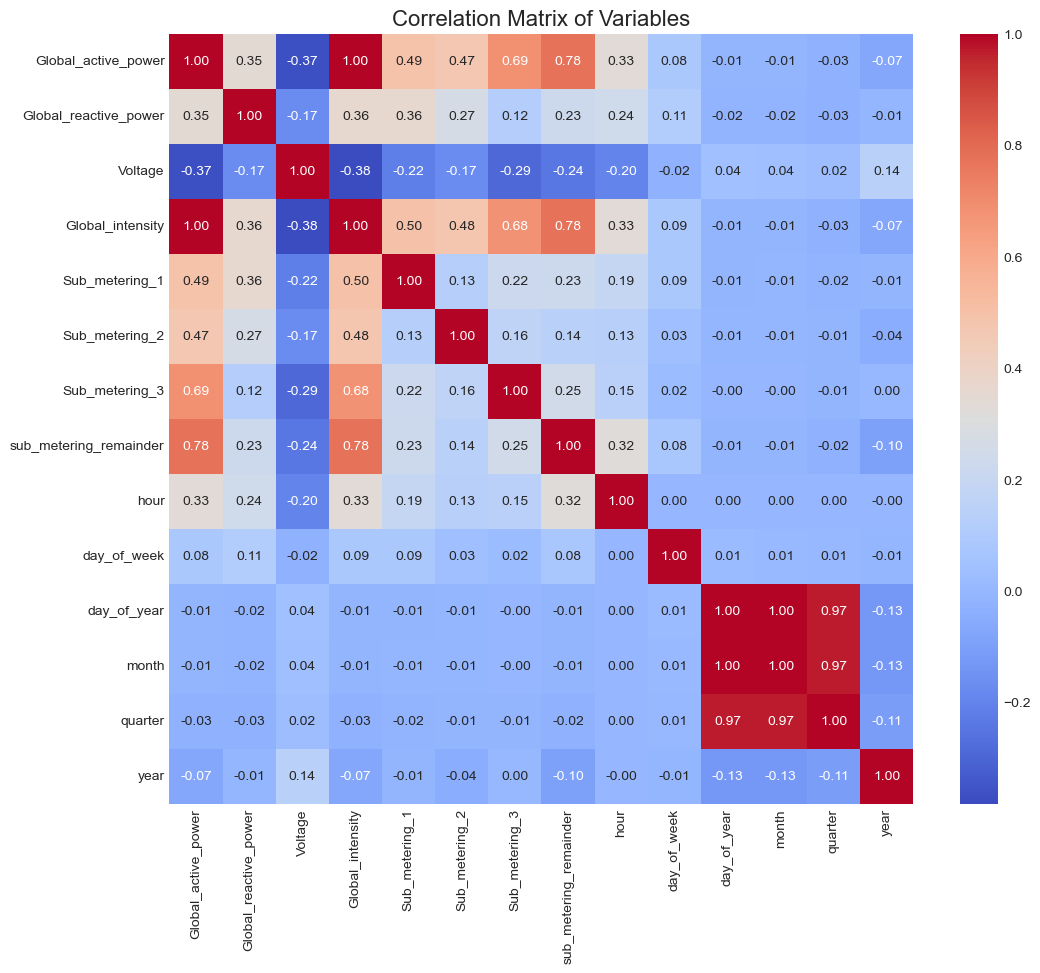

In [21]:
plt.figure(figsize=(12, 10))
correlation_matrix = df_hourly.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables', fontsize=16)
plt.show()

In [24]:
from statsmodels.tsa.stattools import adfuller

def perform_adf_test(series):
    result = adfuller(series.dropna())
    print(f'ADF Statistic: {result[0]:.2f}')
    print(f'p-value: {result[1]:.6f}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.3f}')
    if result[1] < 0.05:
        print("Result: The series is stationary.")
    else:
        print("Result: The series is non-stationary.")

print("Performing ADF test on Global_active_power:")
perform_adf_test(df_hourly['Global_active_power'])

Performing ADF test on Global_active_power:
ADF Statistic: -11.45
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Result: The series is stationary.


c:\Users\ideap\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


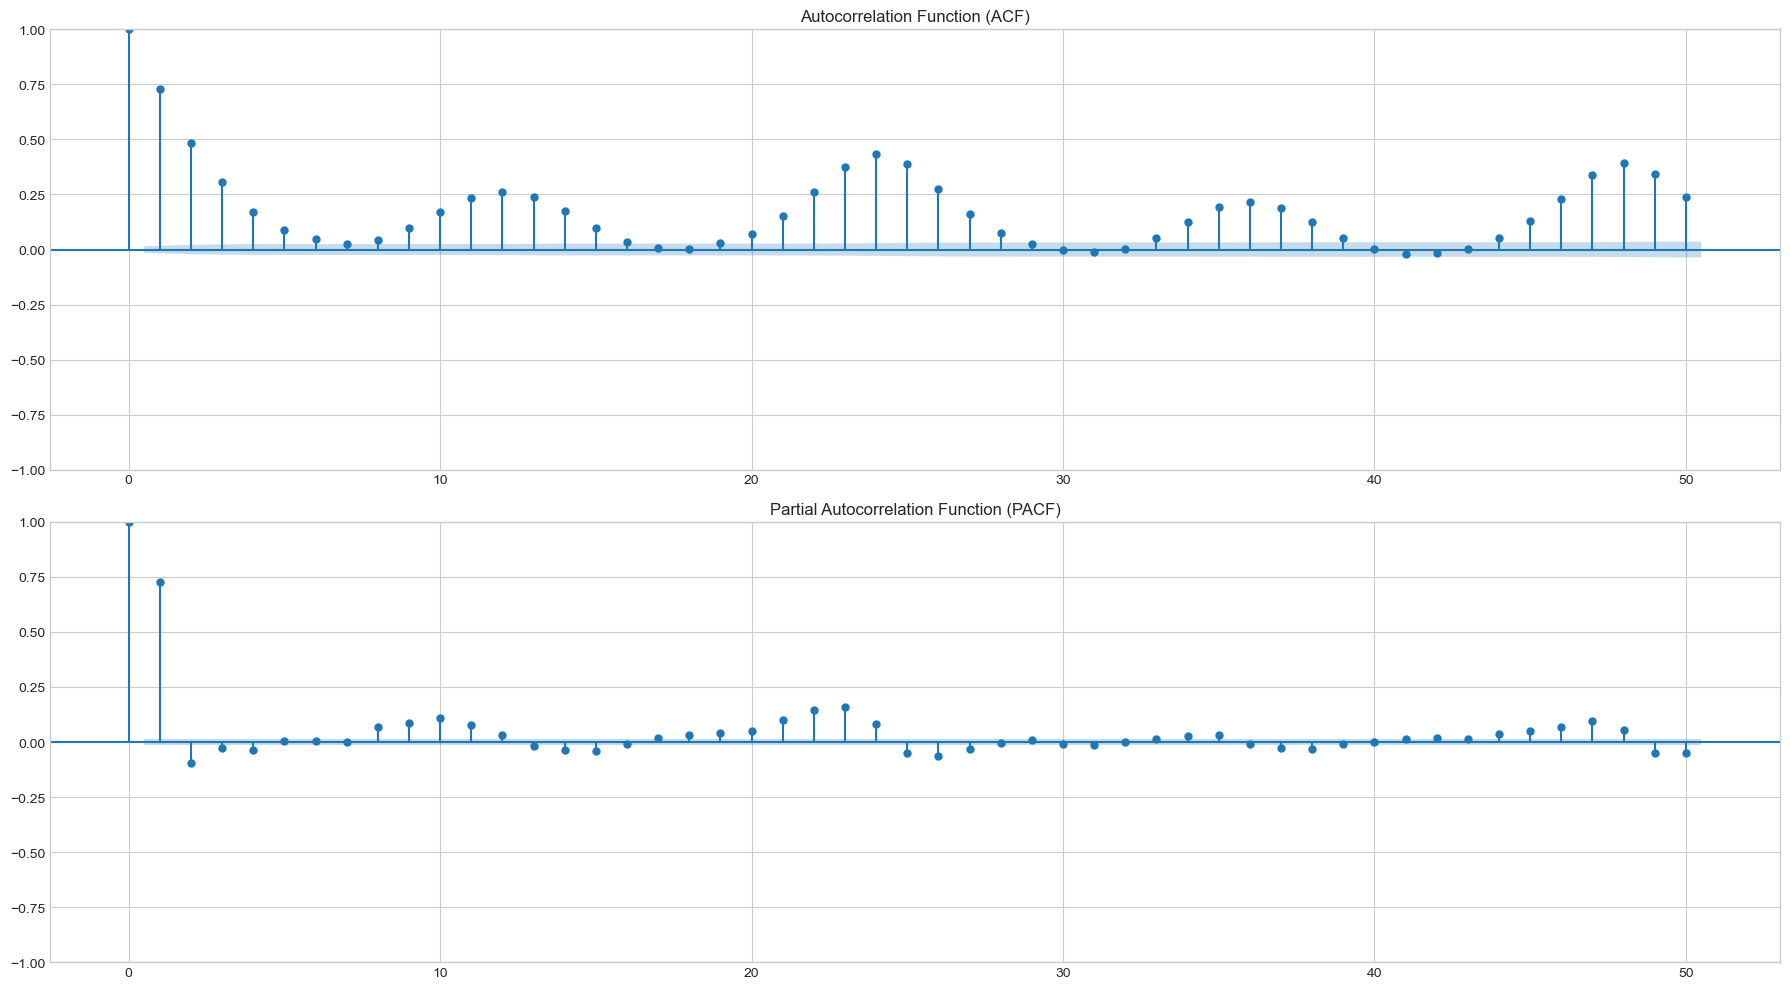

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 10))

plot_acf(df_hourly['Global_active_power'], lags=50, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF)')

plot_pacf(df_hourly['Global_active_power'], lags=50, ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Split data into training and testing sets (last week for testing)
train_data = df_hourly['Global_active_power'][:-168]
test_data = df_hourly['Global_active_power'][-168:]

# Define the SARIMA model parameters
order = (1, 0, 1)
seasonal_order = (1, 1, 1, 24)

# Create and fit the SARIMA model
print("Fitting SARIMA model... This may take several minutes.")
sarima_model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
sarima_results = sarima_model.fit(disp=False)
print("SARIMA model fitting complete.")

# Print the model summary
print(sarima_results.summary())

Fitting SARIMA model... This may take several minutes.
SARIMA model fitting complete.
                                     SARIMAX Results                                      
Dep. Variable:                Global_active_power   No. Observations:                17309
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 24)   Log Likelihood              -15755.886
Date:                            Fri, 19 Sep 2025   AIC                          31521.771
Time:                                    17:53:47   BIC                          31560.559
Sample:                                12-16-2006   HQIC                         31534.552
                                     - 12-06-2008                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6452      0

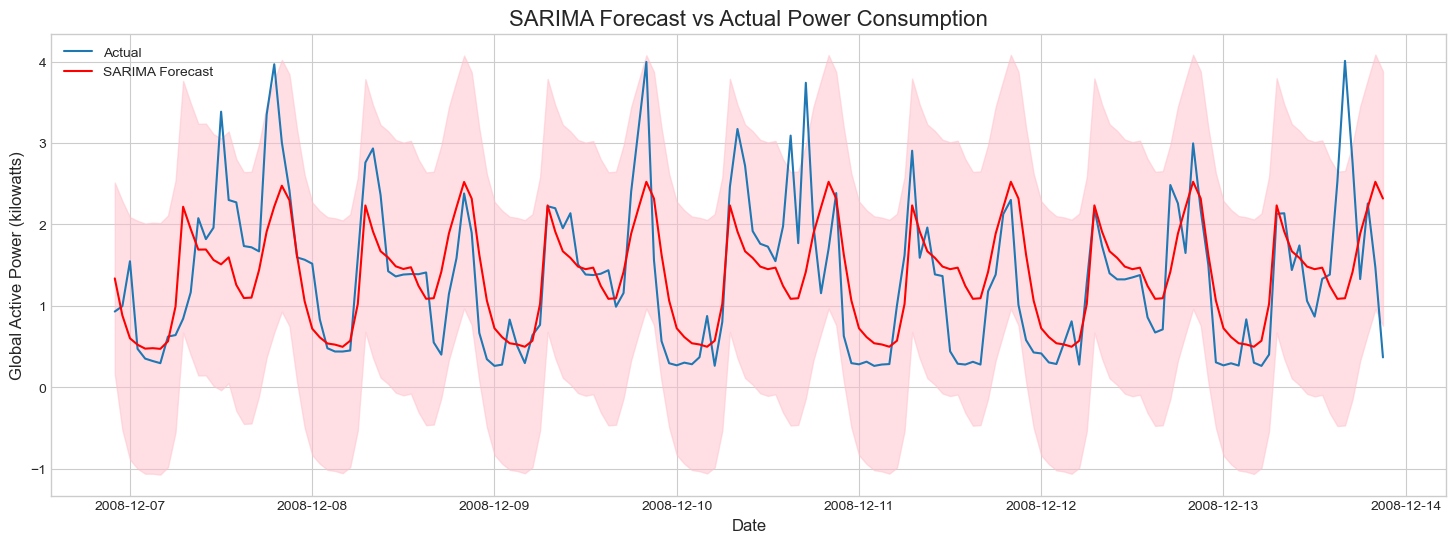

In [27]:
# Generate forecasts for the test period
forecast_steps = len(test_data)
sarima_forecast = sarima_results.get_forecast(steps=forecast_steps)
forecast_mean = sarima_forecast.predicted_mean
confidence_intervals = sarima_forecast.conf_int()

# Plot the forecast against the actual values
plt.figure(figsize=(18, 6))
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(forecast_mean.index, forecast_mean, color='red', label='SARIMA Forecast')
plt.fill_between(confidence_intervals.index,
                 confidence_intervals.iloc[:, 0],
                 confidence_intervals.iloc[:, 1], color='pink', alpha=0.5)
plt.title('SARIMA Forecast vs Actual Power Consumption', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Global Active Power (kilowatts)', fontsize=12)
plt.legend()
plt.show()

In [28]:
# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(test_data, forecast_mean))
mae = mean_absolute_error(test_data, forecast_mean)

print(f"SARIMA Model Performance:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

SARIMA Model Performance:
RMSE: 0.6895
MAE: 0.4994


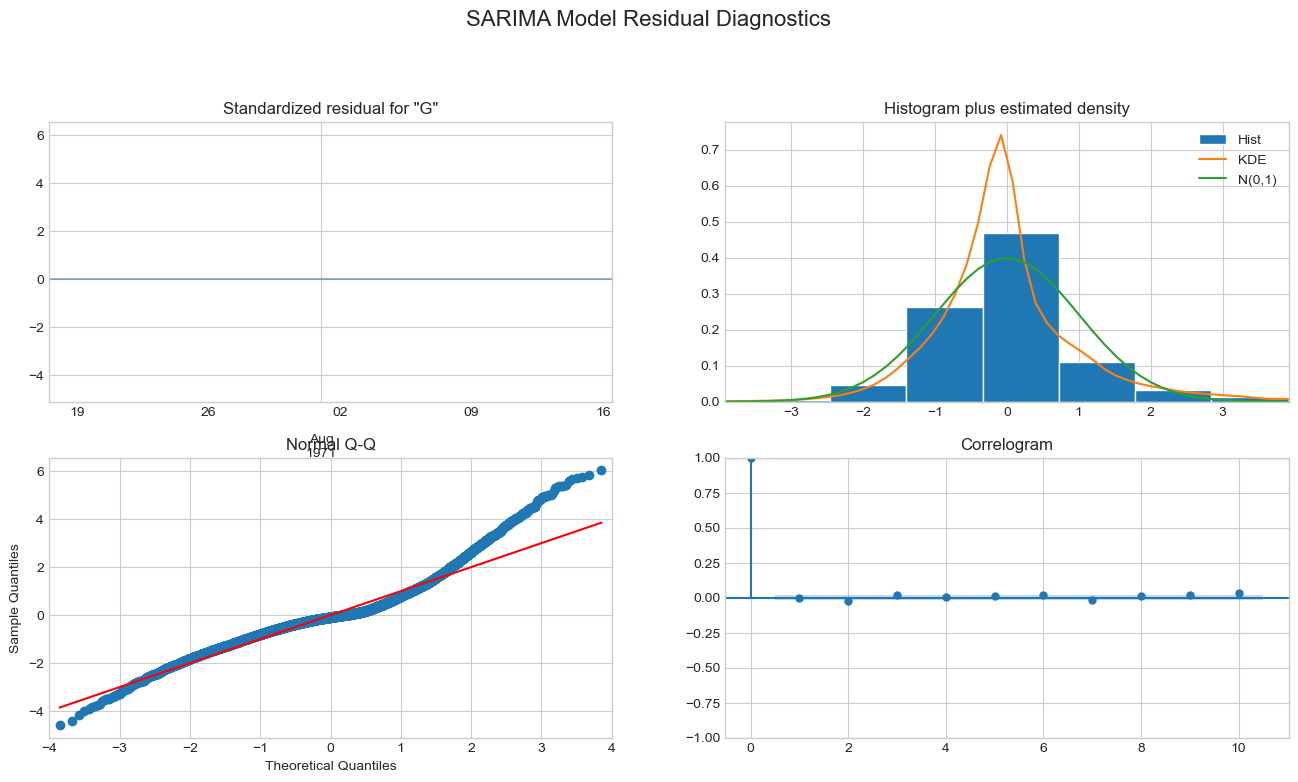

In [29]:
# Plot residual diagnostics
fig = plt.figure(figsize=(16, 8))
sarima_results.plot_diagnostics(fig=fig)
plt.suptitle('SARIMA Model Residual Diagnostics', y=1.02, fontsize=16)
plt.show()

In [31]:
def create_ml_features(df):
    """
    Creates lag and rolling window features for machine learning models.
    """
    df_featured = df.copy()

    # Define lag periods (e.g., 24 hours, 48 hours, 1 week)
    lags = [24, 48, 168]
    for lag in lags:
        df_featured[f'lag_{lag}h'] = df_featured['Global_active_power'].shift(lag)

    # Define rolling window periods
    windows = [24, 48, 168]
    for window in windows:
        df_featured[f'rolling_mean_{window}h'] = df_featured['Global_active_power'].shift(1).rolling(window=window).mean()
        df_featured[f'rolling_std_{window}h'] = df_featured['Global_active_power'].shift(1).rolling(window=window).std()

    # Drop rows with NaN values created by lags/rolling windows
    df_featured.dropna(inplace=True)

    return df_featured

df_ml = create_ml_features(df_hourly)

# Define features (X) and target (y)
features = [col for col in df_ml.columns if col!= 'Global_active_power']
target = 'Global_active_power'

X = df_ml[features]
y = df_ml[target]

# Split data into training and testing sets (last week for testing)
X_train, X_test = X[:-168], X[-168:]
y_train, y_test = y[:-168], y[-168:]

print("Feature matrix (X) and target vector (y) created.")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

Feature matrix (X) and target vector (y) created.
X_train shape: (17141, 22)
X_test shape: (168, 22)


In [32]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, min_samples_leaf=5)
print("Training Random Forest model...")
rf_model.fit(X_train, y_train)
print("Training complete.")

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_mae = mean_absolute_error(y_test, rf_predictions)

print(f"\nRandom Forest Model Performance:")
print(f"RMSE: {rf_rmse:.4f}")
print(f"MAE: {rf_mae:.4f}")

Training Random Forest model...
Training complete.

Random Forest Model Performance:
RMSE: 0.0186
MAE: 0.0134


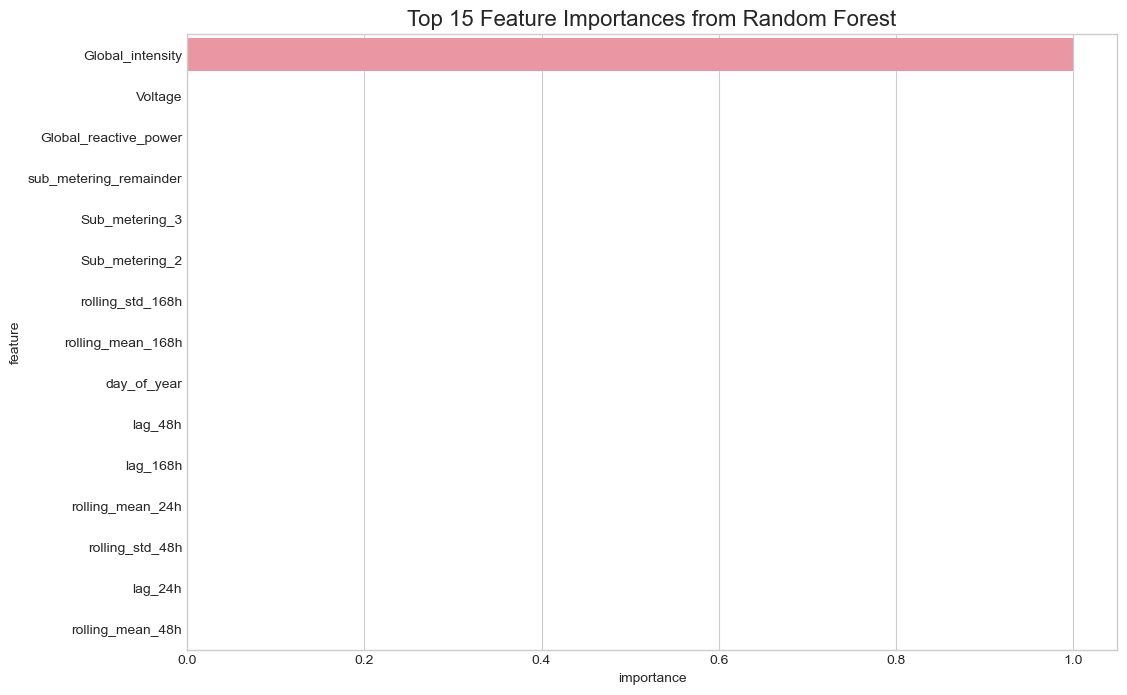

In [33]:
# Get feature importances
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'feature': features, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False).head(15)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Top 15 Feature Importances from Random Forest', fontsize=16)
plt.show()

In [37]:
!pip install xgboost

     ---------------------------------------- 56.8/56.8 MB 7.9 MB/s eta 0:00:00


In [39]:
import xgboost as xgb

# Initialize and train the XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=500, learning_rate=0.05, random_state=42, n_jobs=-1, objective='reg:squarederror')
print("\nTraining XGBoost model...")
xgb_model.fit(X_train, y_train,
                eval_set=[(X_test, y_test)]) # Corrected the call to fit
print("Training complete.")

# Make predictions on the test set
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the model
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))
xgb_mae = mean_absolute_error(y_test, xgb_predictions)

print(f"\nXGBoost Model Performance:")
print(f"RMSE: {xgb_rmse:.4f}")
print(f"MAE: {xgb_mae:.4f}")


Training XGBoost model...
[0]	validation_0-rmse:0.90479
[1]	validation_0-rmse:0.86077
[2]	validation_0-rmse:0.81867
[3]	validation_0-rmse:0.77855
[4]	validation_0-rmse:0.74053
[5]	validation_0-rmse:0.70392
[6]	validation_0-rmse:0.66970
[7]	validation_0-rmse:0.63703
[8]	validation_0-rmse:0.60599
[9]	validation_0-rmse:0.57639
[10]	validation_0-rmse:0.54830
[11]	validation_0-rmse:0.52167
[12]	validation_0-rmse:0.49658
[13]	validation_0-rmse:0.47256
[14]	validation_0-rmse:0.44998
[15]	validation_0-rmse:0.42816
[16]	validation_0-rmse:0.40774
[17]	validation_0-rmse:0.38810
[18]	validation_0-rmse:0.36946
[19]	validation_0-rmse:0.35199
[20]	validation_0-rmse:0.33517
[21]	validation_0-rmse:0.31939
[22]	validation_0-rmse:0.30443
[23]	validation_0-rmse:0.29000
[24]	validation_0-rmse:0.27642
[25]	validation_0-rmse:0.26347
[26]	validation_0-rmse:0.25111
[27]	validation_0-rmse:0.23945
[28]	validation_0-rmse:0.22828
[29]	validation_0-rmse:0.21768
[30]	validation_0-rmse:0.20759
[31]	validation_0-rmse

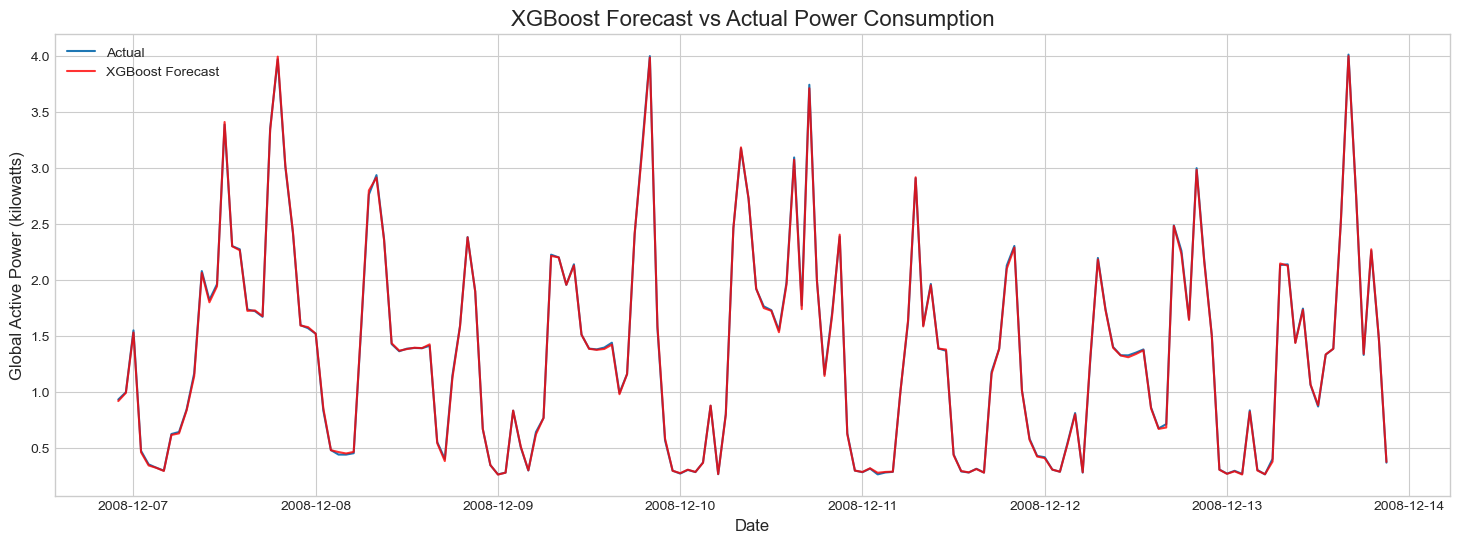

In [40]:
# Plot predictions vs actuals for the best ML model
plt.figure(figsize=(18, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, xgb_predictions, color='red', label='XGBoost Forecast', alpha=0.8)
plt.title('XGBoost Forecast vs Actual Power Consumption', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Global Active Power (kilowatts)', fontsize=12)
plt.legend()
plt.show()

In [52]:
from sklearn.preprocessing import MinMaxScaler

def create_sequences(X, y, time_steps=24):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

X_train_df = pd.DataFrame(X_train, columns=features)
X_test_df = pd.DataFrame(X_test, columns=features)
y_train_s = pd.Series(y_train, name=target)
y_test_s = pd.Series(y_test, name=target)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_df)
X_test_scaled = scaler.transform(X_test_df)
target_scaler = MinMaxScaler()
y_train_scaled = target_scaler.fit_transform(y_train_s.values.reshape(-1, 1))
y_test_scaled = target_scaler.transform(y_test_s.values.reshape(-1, 1))

TIME_STEPS = 24
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled, TIME_STEPS)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_scaled, TIME_STEPS)

# Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.from_numpy(X_train_seq).float()
y_train_tensor = torch.from_numpy(y_train_seq).float()
X_test_tensor = torch.from_numpy(X_test_seq).float()
y_test_tensor = torch.from_numpy(y_test_seq).float()

In [50]:
import torch
import torch.nn as nn

In [53]:
class PowerLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers=2, output_size=1):
        super(PowerLSTM, self).__init__()
        self.lstm1 = nn.LSTM(input_size, hidden_size, num_layers=num_layers, batch_first=True, bidirectional=True)
        self.dropout1 = nn.Dropout(0.2)
        self.lstm2 = nn.LSTM(hidden_size * 2, hidden_size, batch_first=True, bidirectional=True)
        self.dropout2 = nn.Dropout(0.2)
        self.fc = nn.Linear(hidden_size * 2, output_size)

    def forward(self, x):
        # Initial forward pass through the first LSTM layer
        lstm_out1, _ = self.lstm1(x)
        # Apply dropout to the output of the first LSTM layer
        x = self.dropout1(lstm_out1)
        # Forward pass through the second LSTM layer, using the output of the first layer
        lstm_out2, _ = self.lstm2(x)
        # Apply dropout to the output of the second LSTM layer
        x = self.dropout2(lstm_out2[:, -1, :])  # Take the output from the last time step
        # Forward pass through the fully connected layer
        out = self.fc(x)
        return out

# Instantiate the model with appropriate dimensions
input_size = X_train_tensor.shape[2]  # Number of features
hidden_size = 50  # Number of units in the LSTM layer
model = PowerLSTM(input_size=input_size, hidden_size=hidden_size)

print("PyTorch model summary:")
print(model)

PyTorch model summary:
PowerLSTM(
  (lstm1): LSTM(22, 50, num_layers=2, batch_first=True, bidirectional=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (lstm2): LSTM(100, 50, batch_first=True, bidirectional=True)
  (dropout2): Dropout(p=0.2, inplace=False)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)


In [58]:
input_size = X_train_tensor.shape[2]
hidden_size = 50
model = PowerLSTM(input_size=input_size, hidden_size=hidden_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 10
print(f"\nTraining PyTorch BiLSTM model for {epochs} epochs...")
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    # The conditional statement is removed to print loss for every epoch
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

print("Training complete.")

# Make predictions and evaluate
model.eval()
with torch.no_grad():
    predictions_tensor = model(X_test_tensor)
predictions_np = predictions_tensor.numpy()
y_test_np = y_test_tensor.numpy()
predictions_np = target_scaler.inverse_transform(predictions_np)
y_test_np = target_scaler.inverse_transform(y_test_np)
rmse = np.sqrt(mean_squared_error(y_test_np, predictions_np))
mae = mean_absolute_error(y_test_np, predictions_np)

print(f"\nPyTorch BiLSTM Model Performance:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")


Training PyTorch BiLSTM model for 10 epochs...
Epoch [1/10], Loss: 0.0292
Epoch [2/10], Loss: 0.0249
Epoch [3/10], Loss: 0.0227
Epoch [4/10], Loss: 0.0223
Epoch [5/10], Loss: 0.0230
Epoch [6/10], Loss: 0.0234
Epoch [7/10], Loss: 0.0232
Epoch [8/10], Loss: 0.0227
Epoch [9/10], Loss: 0.0222
Epoch [10/10], Loss: 0.0218
Training complete.

PyTorch BiLSTM Model Performance:
RMSE: 0.8976
MAE: 0.7238
